In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the csv file
main=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

# Making the main copy to work on
df=main.copy()

In [3]:
# Getting the dimensions (rows and columns)
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
# All columns
df.columns.value_counts()

User_ID             1
Cust_name           1
Product_ID          1
Gender              1
Age Group           1
Age                 1
Marital_Status      1
State               1
Zone                1
Occupation          1
Product_Category    1
Orders              1
Amount              1
Status              1
unnamed1            1
Name: count, dtype: int64

In [7]:
# Amount of null values in rows
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [8]:
# How many Females and Males in Data
df['Gender'].value_counts()

Gender
F    7842
M    3409
Name: count, dtype: int64

In [9]:
# Dropping Unneeded columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [10]:
# Dropping na values
df.dropna(axis=0,inplace=True)

In [11]:
# Checking for na values
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
# Not accurate type. Need for change
df['Amount'].dtypes

dtype('float64')

In [13]:
df['Amount']=df['Amount'].astype('int')

In [14]:
# Recheck
df['Amount'].dtypes

dtype('int32')

In [15]:
# Renaming the columns
df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [16]:
# An alternative way
#df['Shaddi']=df['Marital_Status']
#df.drop(['Marital_Status'])

In [17]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [18]:
df[['Age','Orders','Amount']].describe()

# Or 
# selected_columns = ['Age', 'Orders', 'Amount']
# df[selected_columns].describe()


,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## VISUAL DATA ANALYSIS

C:\Users\harsh\AppData\Local\Temp\ipykernel_11140\1749632822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Gender',data=df,palette='Set1',saturation=1)


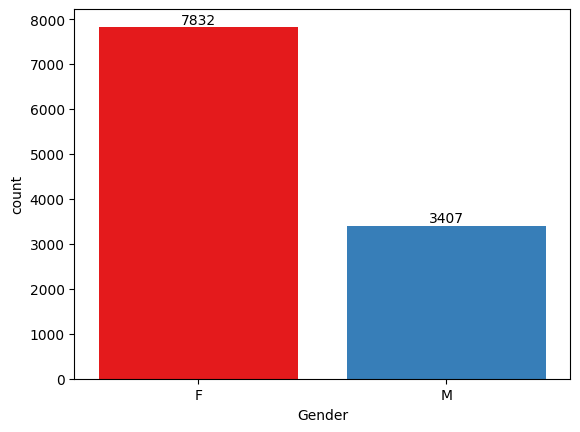

In [19]:
# Bar chart for Gender Difference Count

ax=sns.countplot(x='Gender',data=df,palette='Set1',saturation=1)

for bars in ax.containers:
  ax.bar_label(bars)

C:\Users\harsh\AppData\Local\Temp\ipykernel_11140\2685239256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen,palette='Set2')


<Axes: xlabel='Gender', ylabel='Amount'>

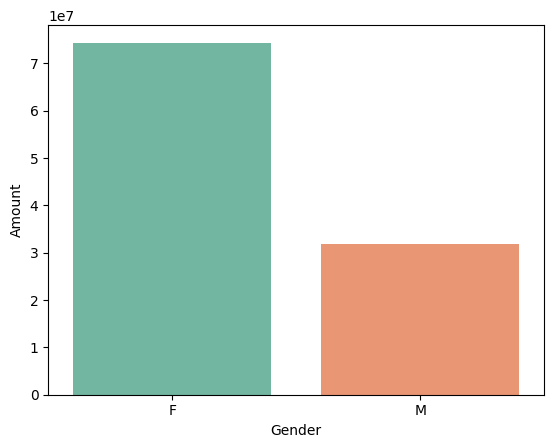

In [47]:
# plotting a bar chart for gender vs total amount
sales_gen= df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen,palette='Set2')

# By Age

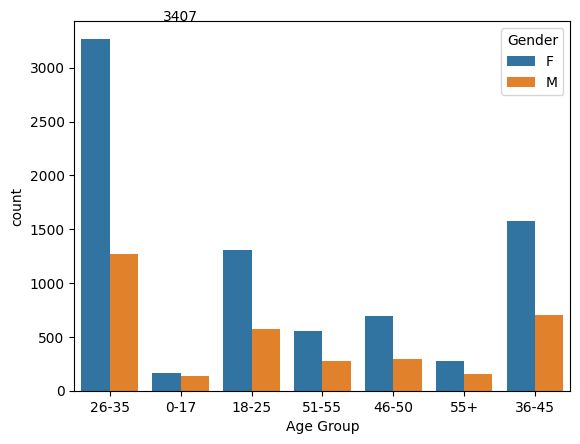

In [52]:
ap=sns.countplot(x='Age Group',data=df,hue='Gender')

for bars in ax.containers:
  ap.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

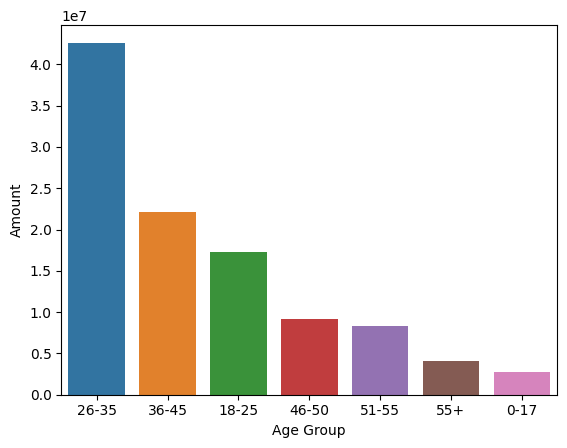

In [54]:
# Total amount vs Age Group

sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data=sales_age,hue='Age Group')

# By State

<Axes: xlabel='State', ylabel='Orders'>

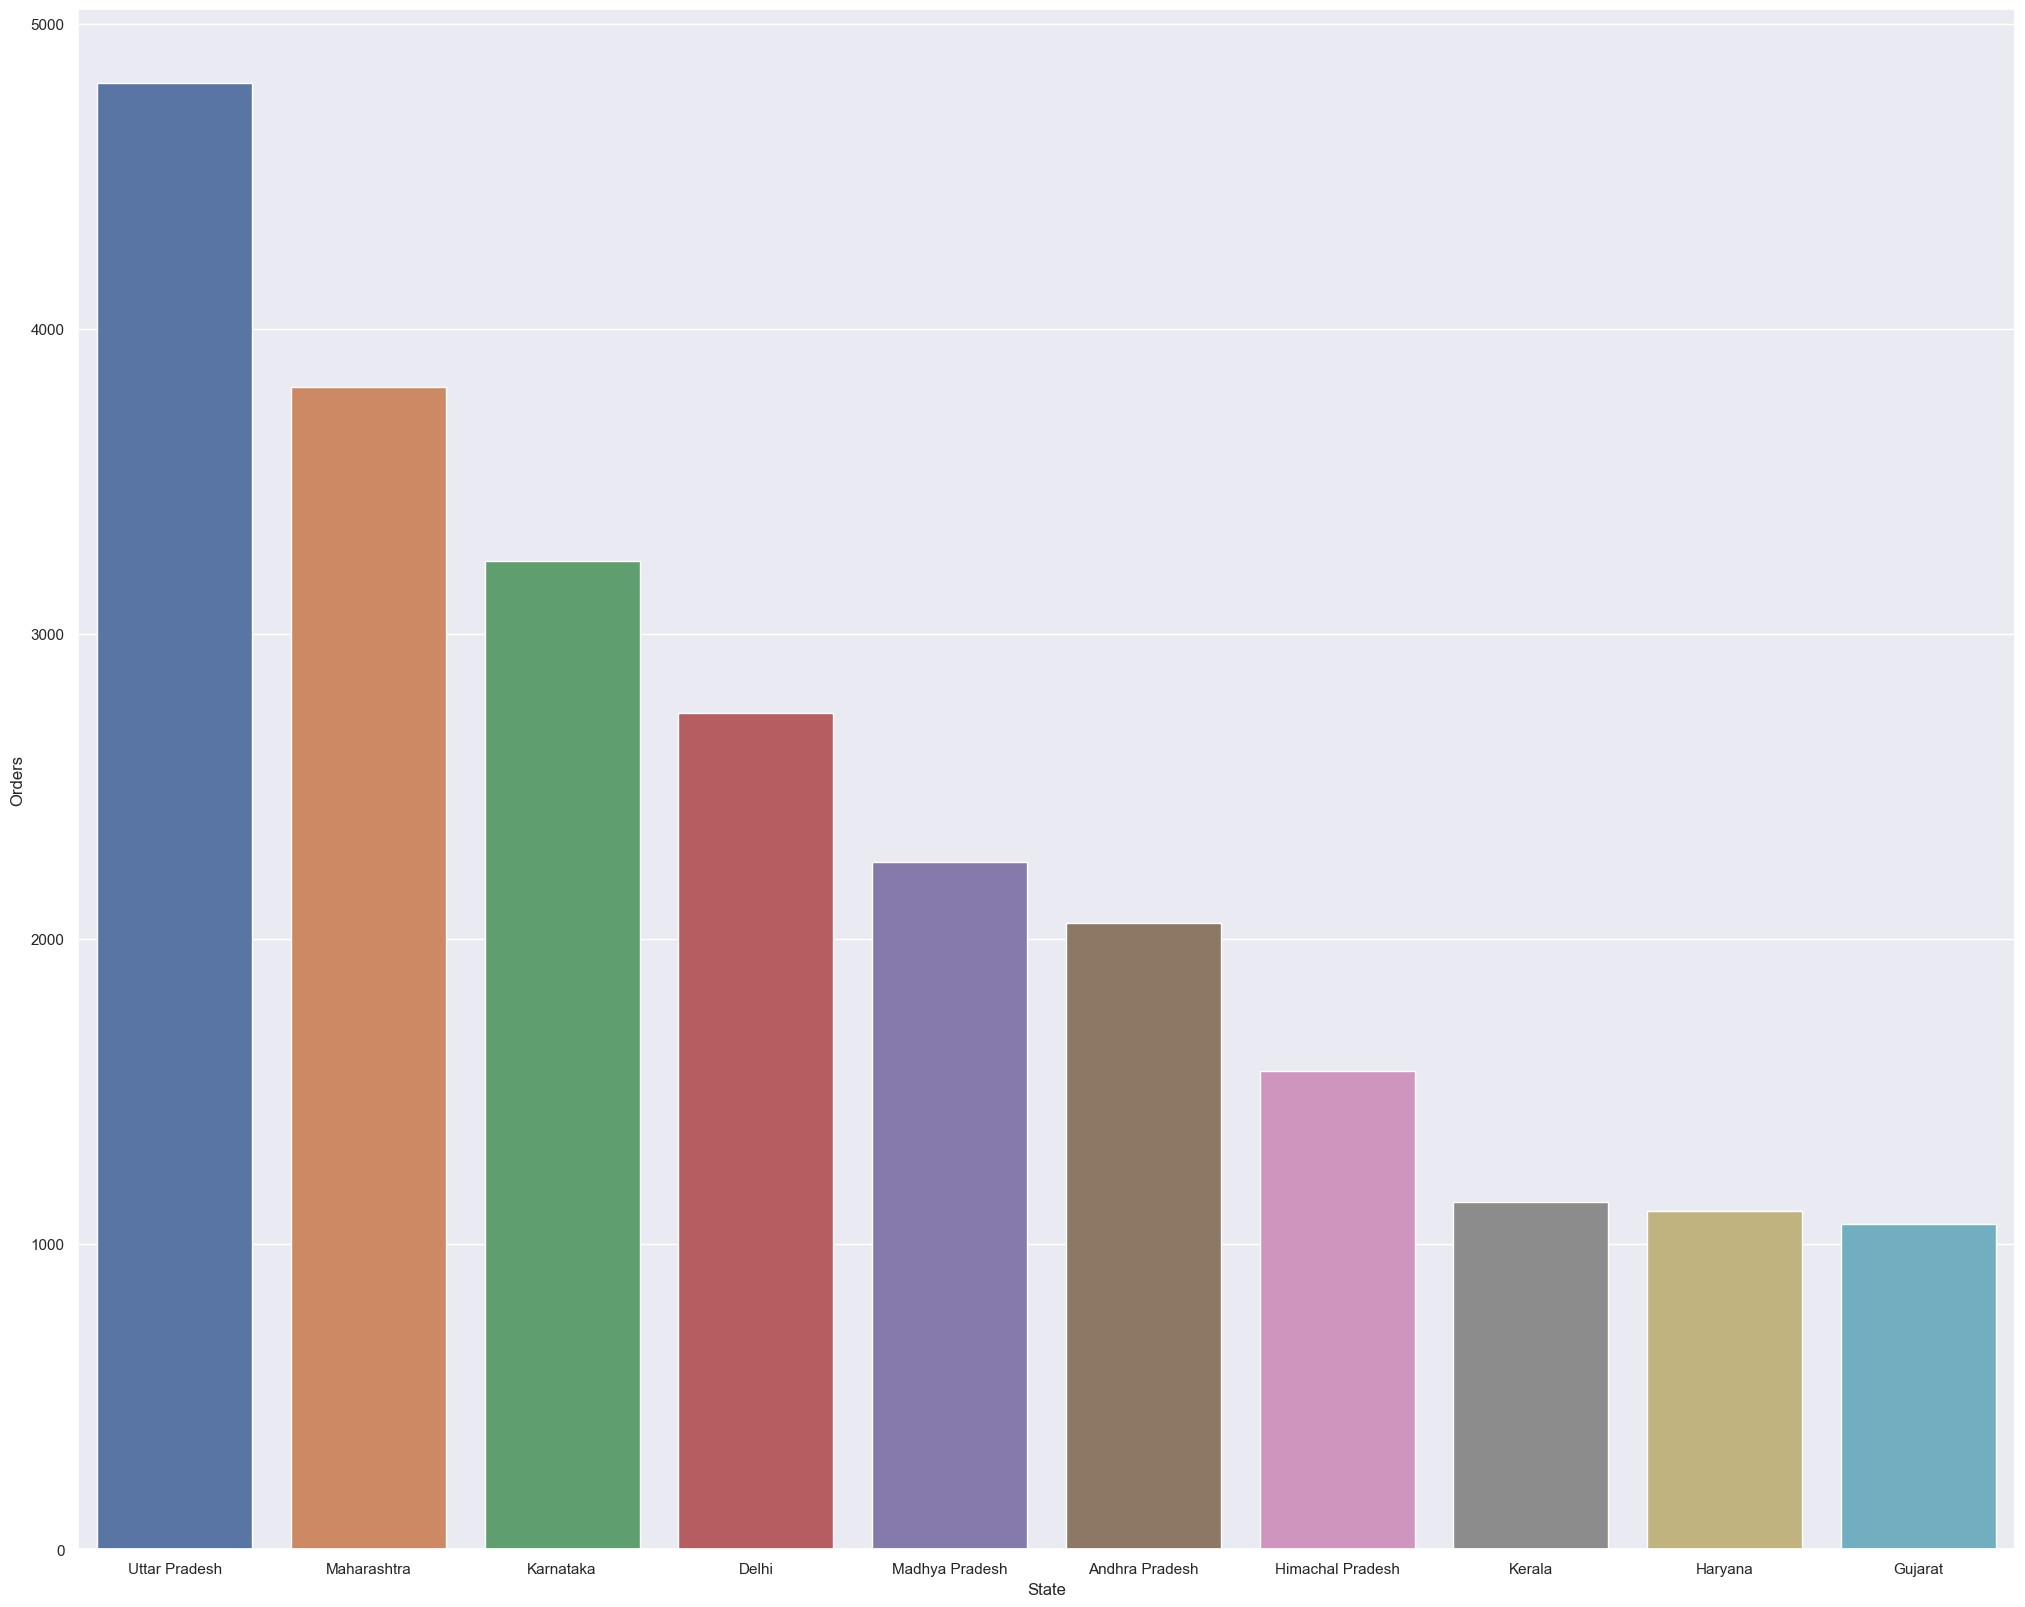

In [91]:
# Orders by state (Top 10)

sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.barplot(x='State',y='Orders',data=sales_state,hue='State')

<Axes: xlabel='State', ylabel='Amount'>

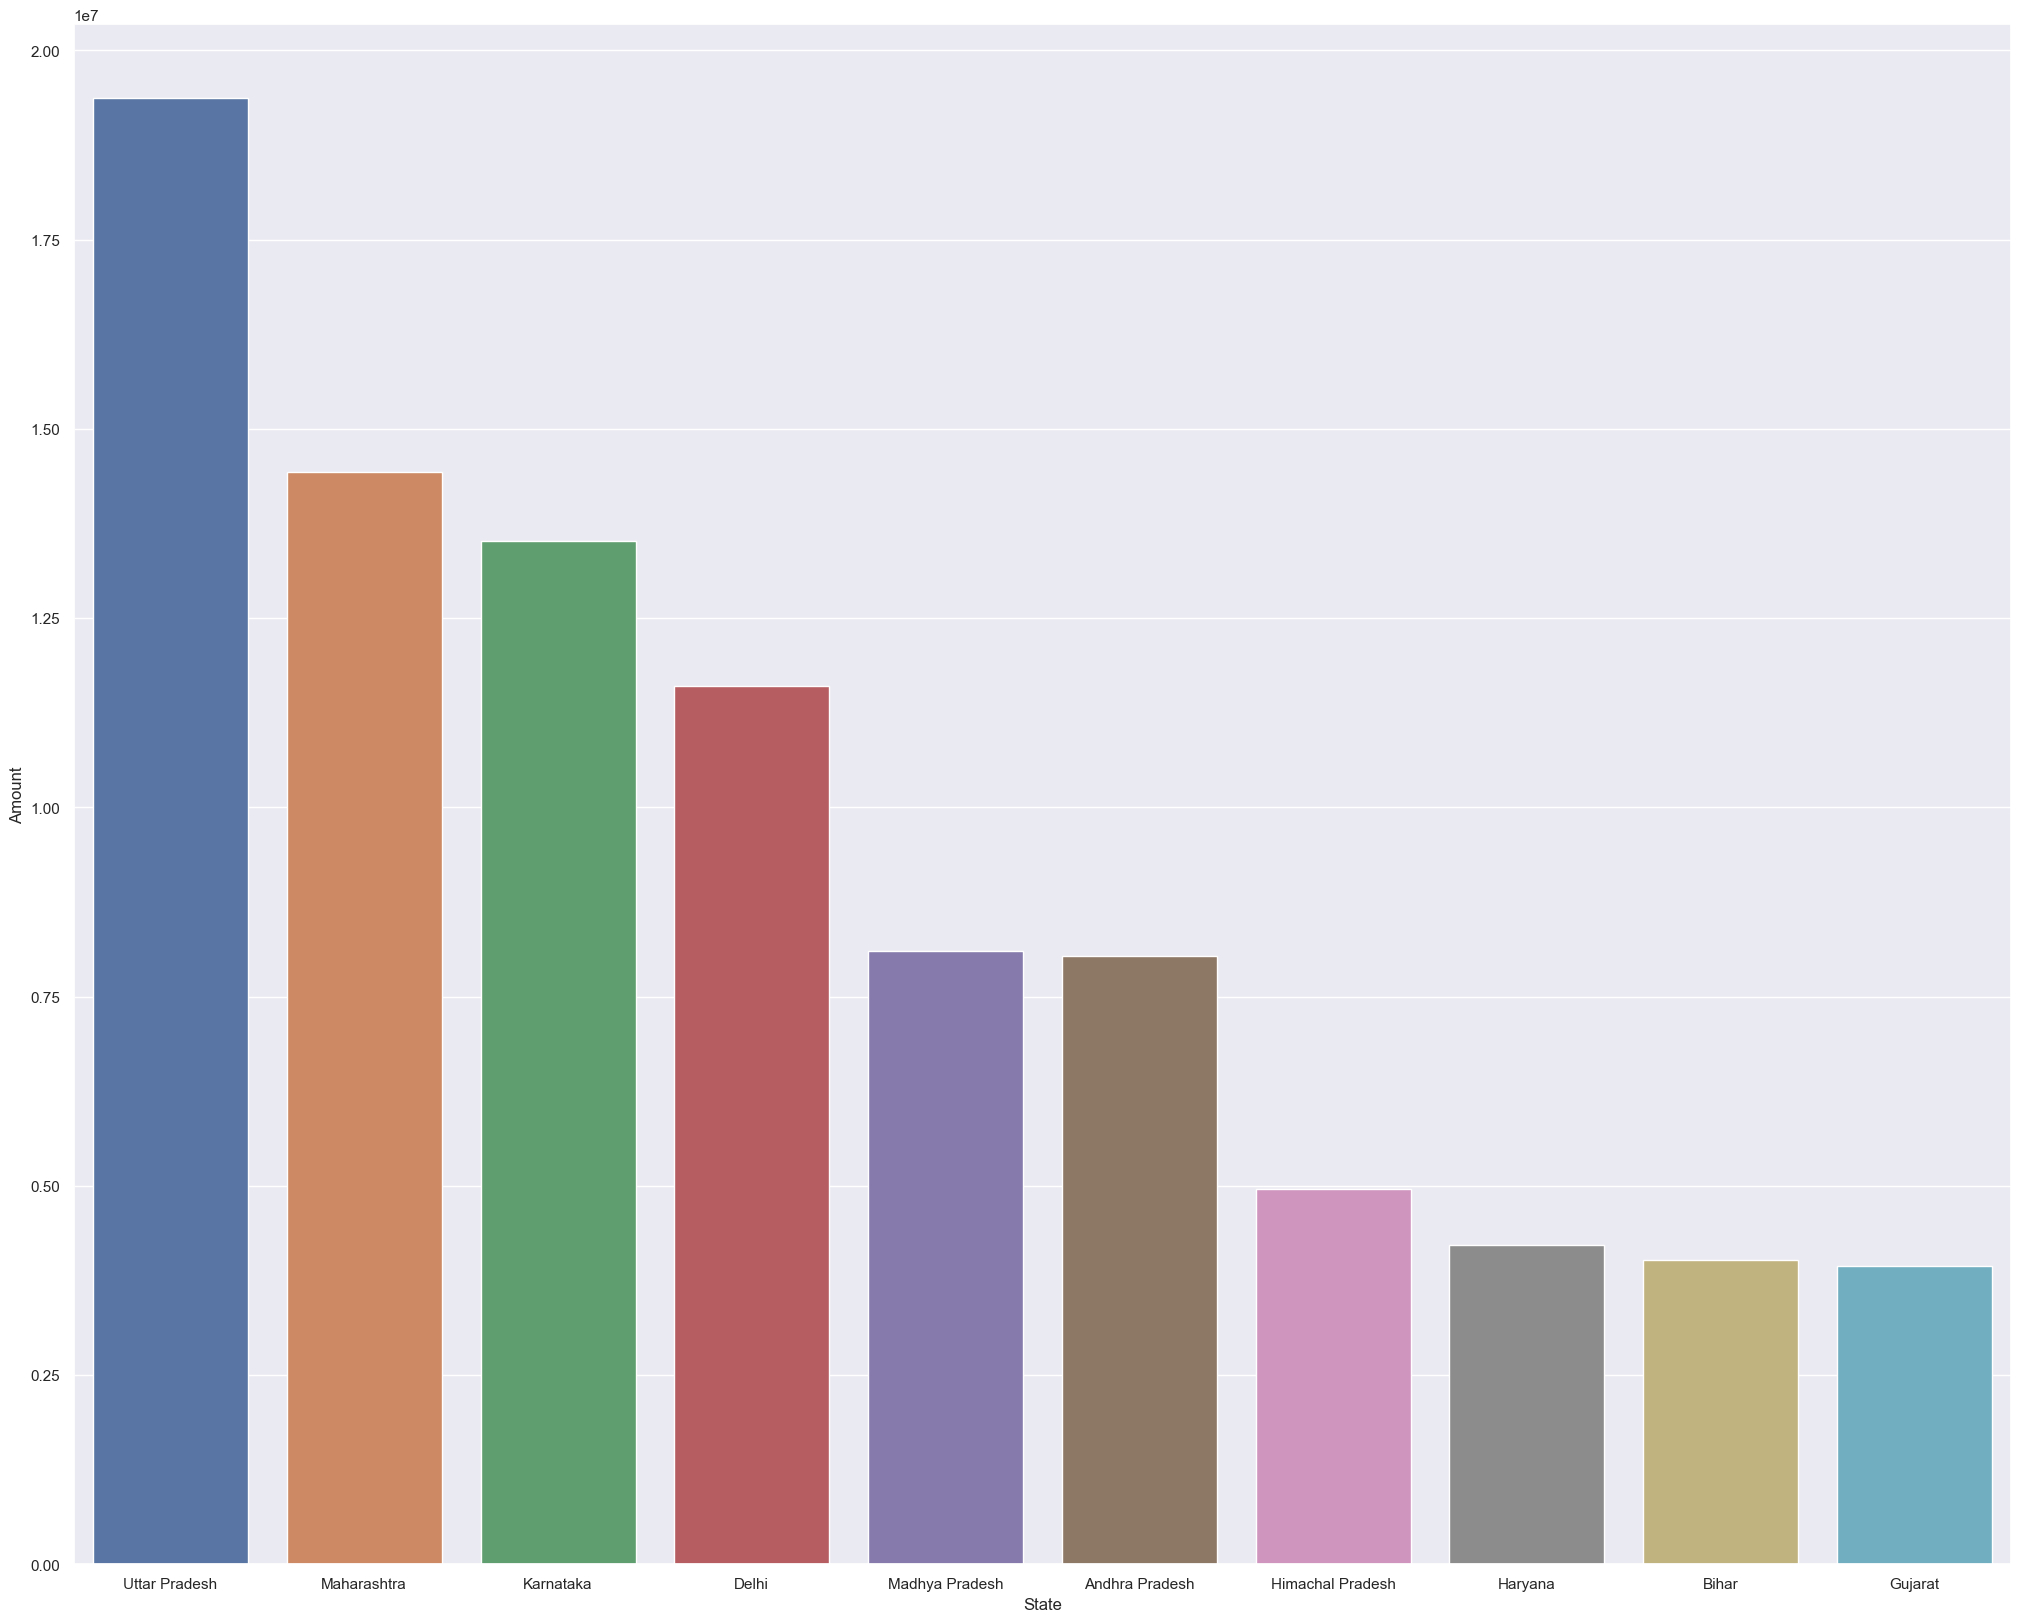

In [92]:
# Sales Amount by state (Top 10)

sales_amount=df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(25,20)})

sns.barplot(data=sales_amount,x='State',y='Amount',hue='State')


# Marital status

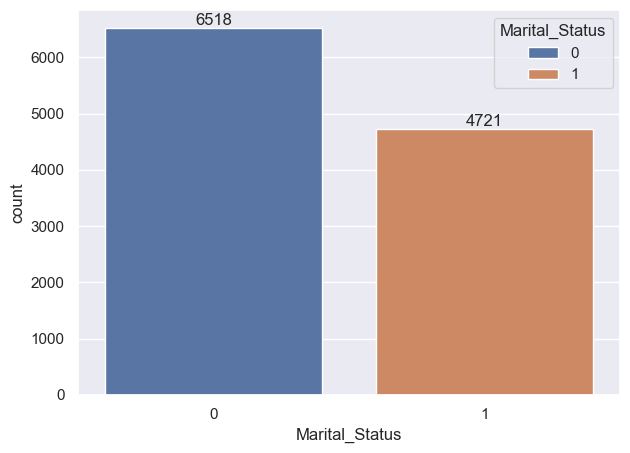

In [97]:
ax=sns.countplot(x='Marital_Status',data=df,hue='Marital_Status')

sns.set_theme(rc={'figure.figsize':(7,5)})

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

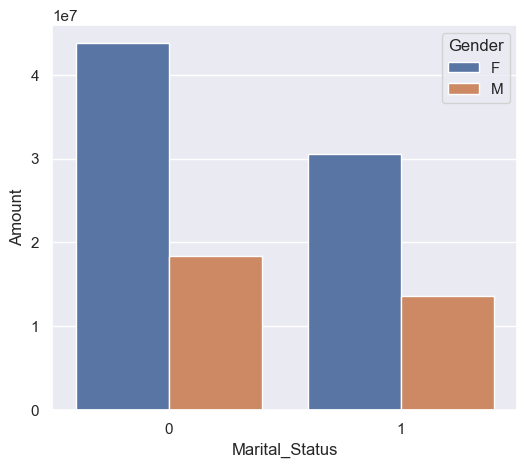

In [190]:
# Marital Status by gender

sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set_theme(rc={'figure.figsize':(6,5)})

sns.barplot(data= sales_state,x='Marital_Status',y='Amount',hue='Gender')

# Occupation

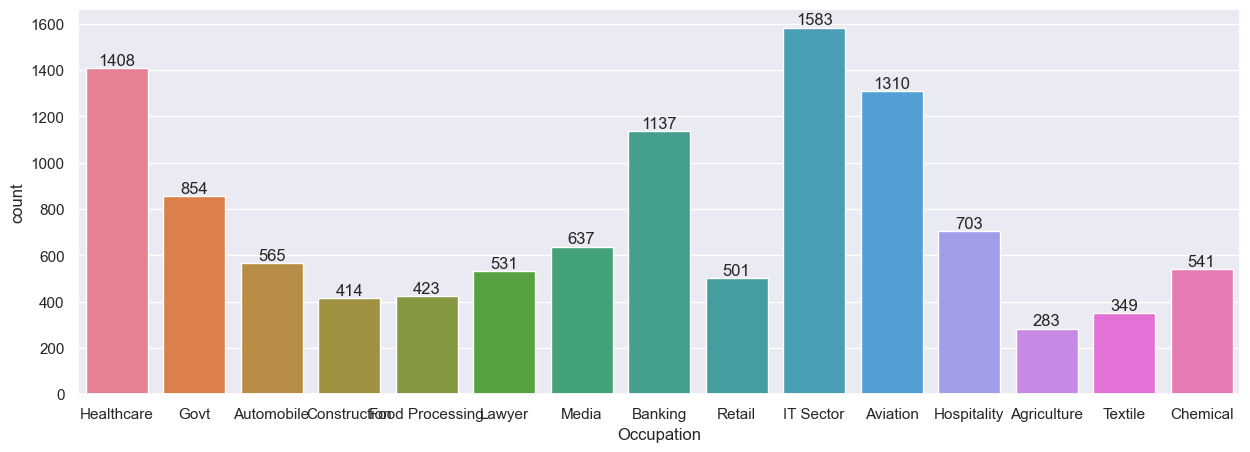

In [122]:
ax=sns.countplot(data=df,x='Occupation',hue='Occupation')

sns.set_theme(rc={'figure.figsize':(15,5)})

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

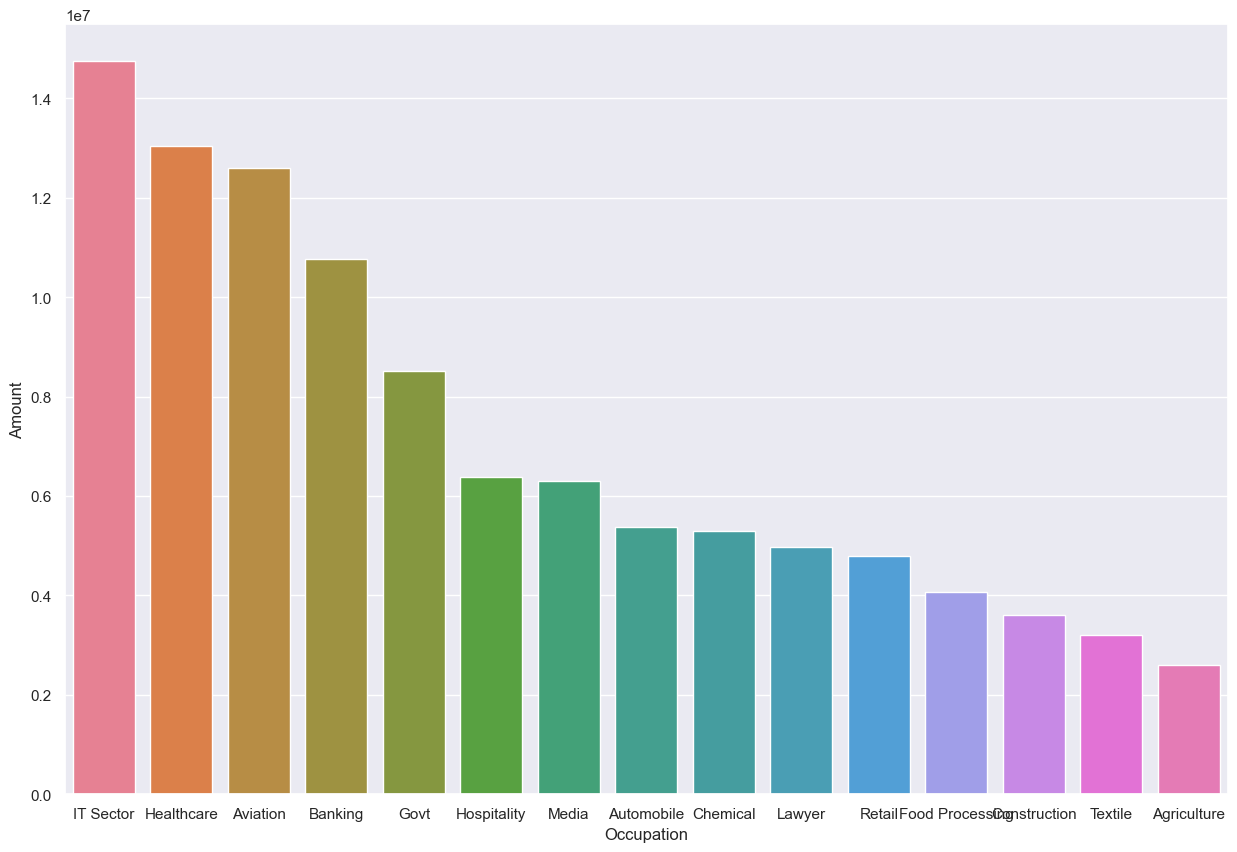

In [183]:
# Sales by occupation

sales_occ=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set_theme(rc={'figure.figsize':(15,10)})

sns.barplot(data=sales_occ,x='Occupation',y='Amount',hue='Occupation')

# Product category

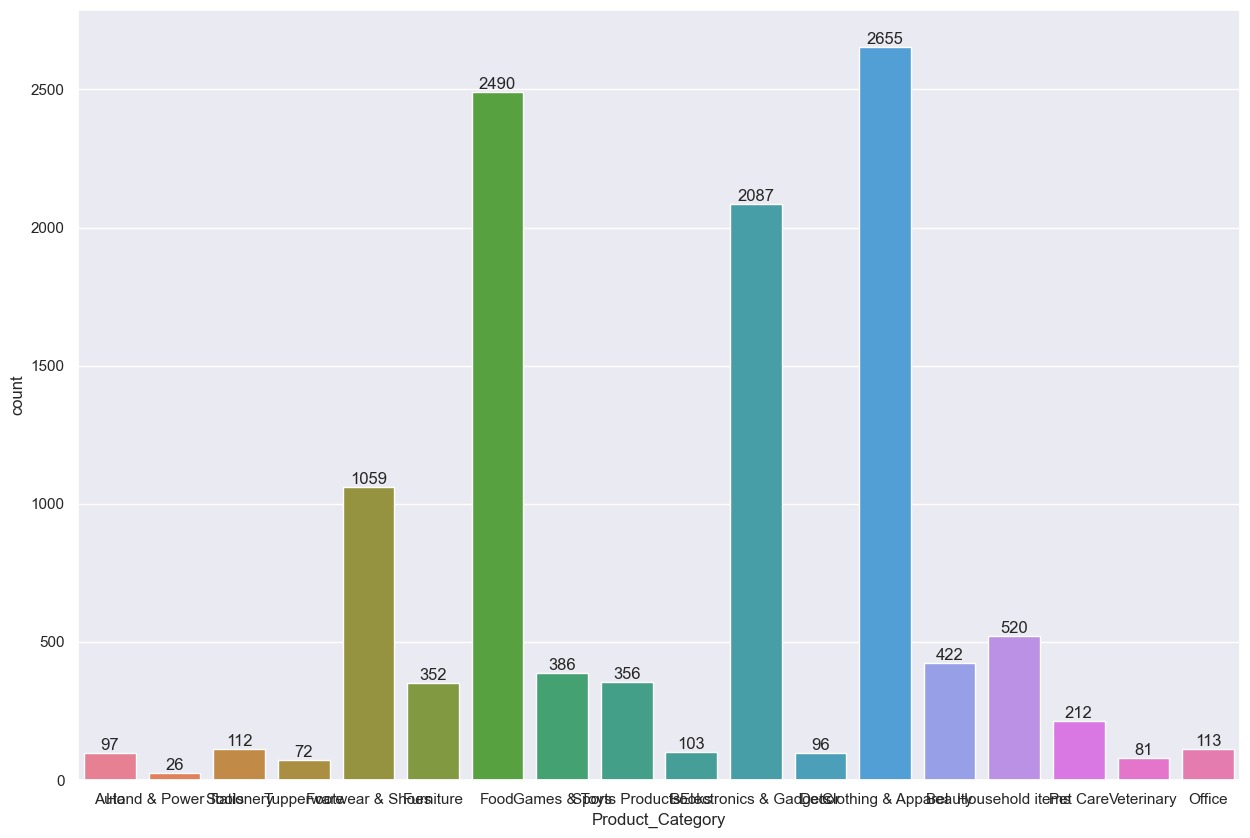

In [184]:
ax=sns.countplot(data=df,x='Product_Category',hue='Product_Category')

sns.set_theme(rc={'figure.figsize':(25,15)})

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

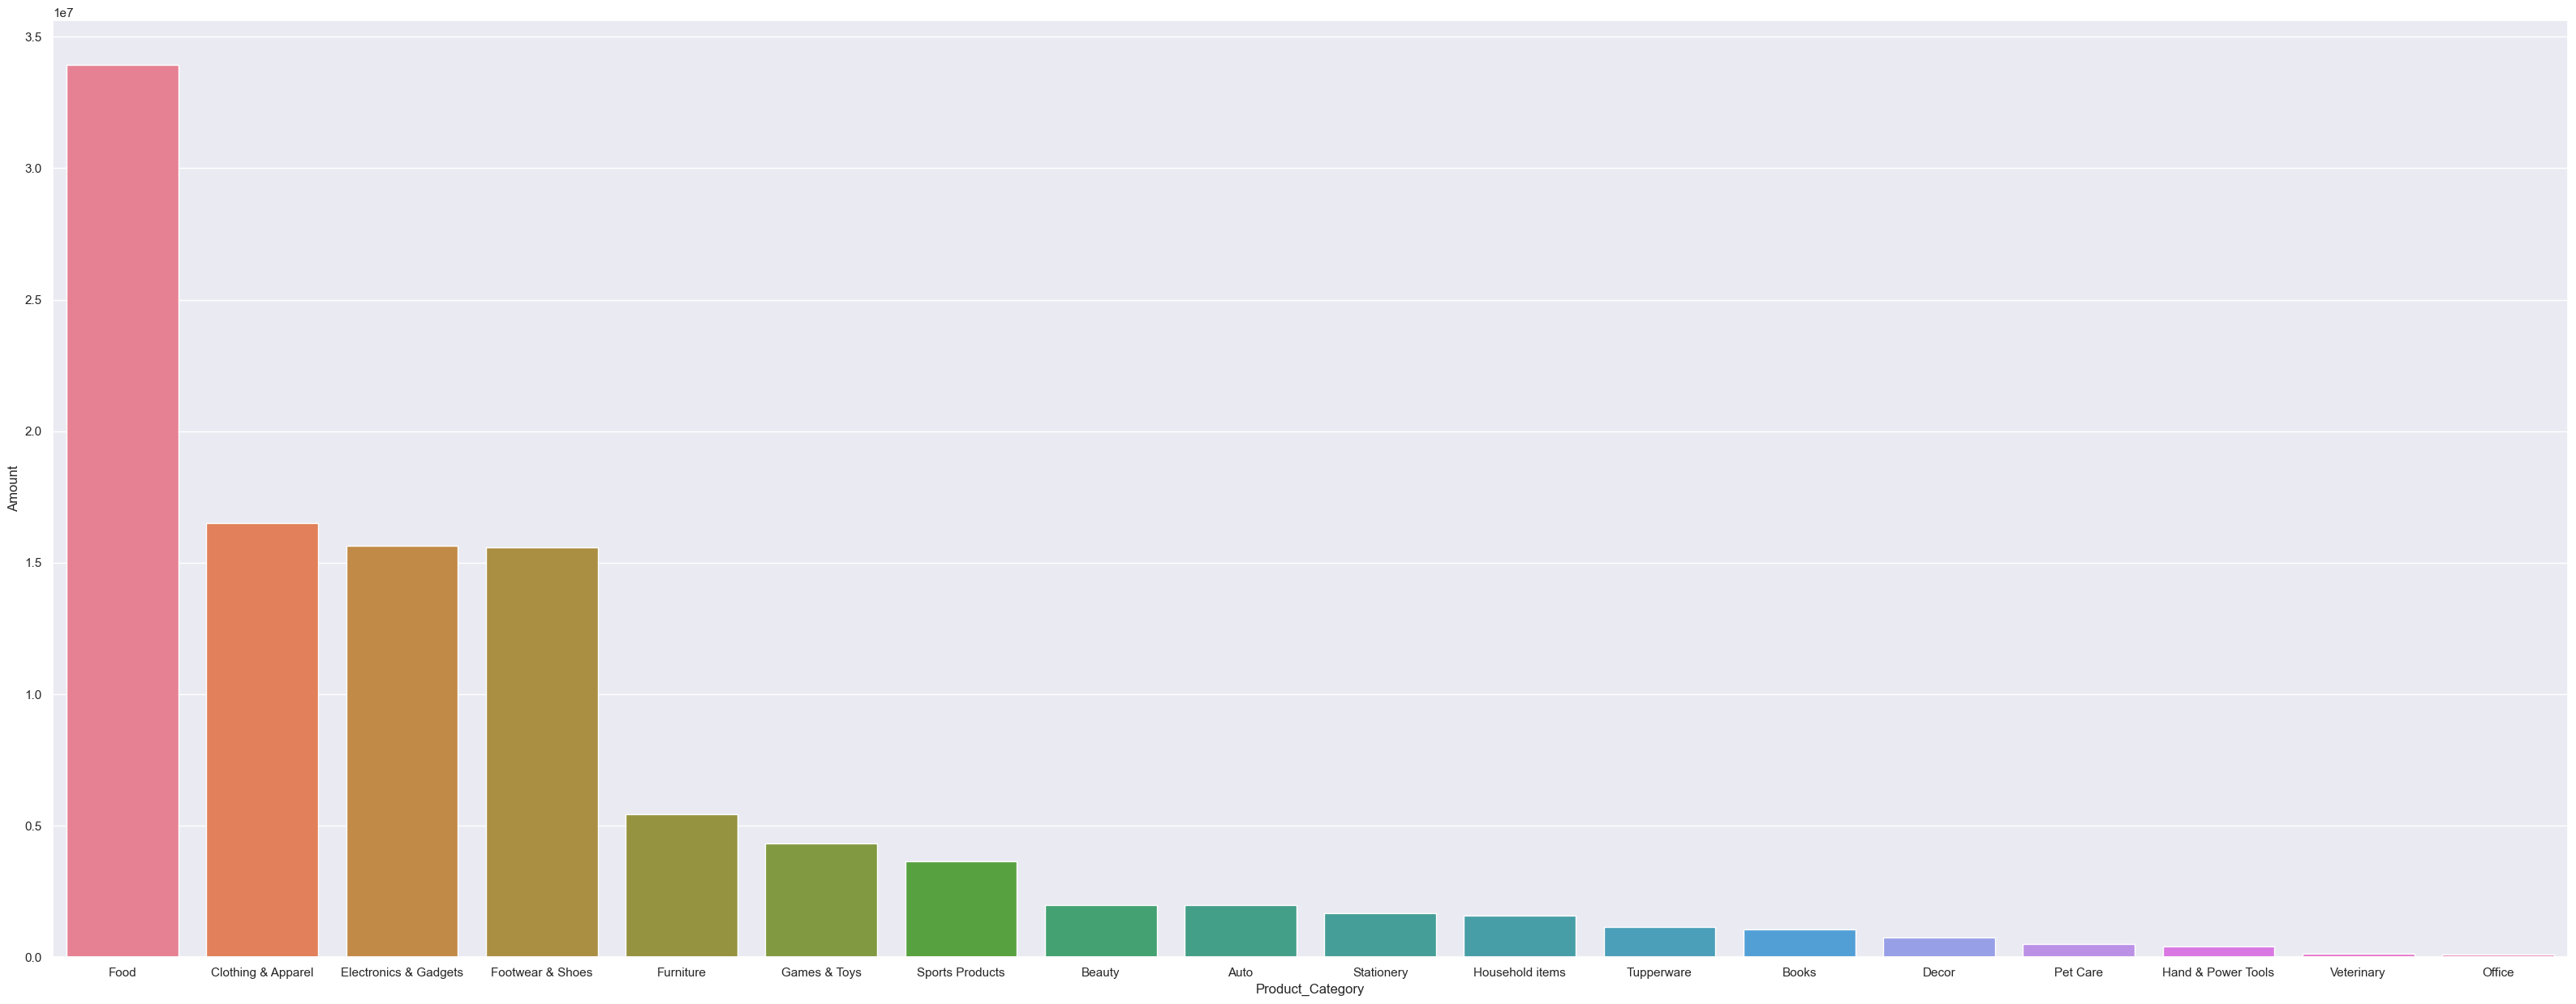

In [182]:
# sales by Product

sales_product=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set_theme(rc={'figure.figsize':(40,15)})

sns.barplot(x='Product_Category',y='Amount',data=sales_product,hue='Product_Category')



<Axes: xlabel='Product_ID', ylabel='Orders'>

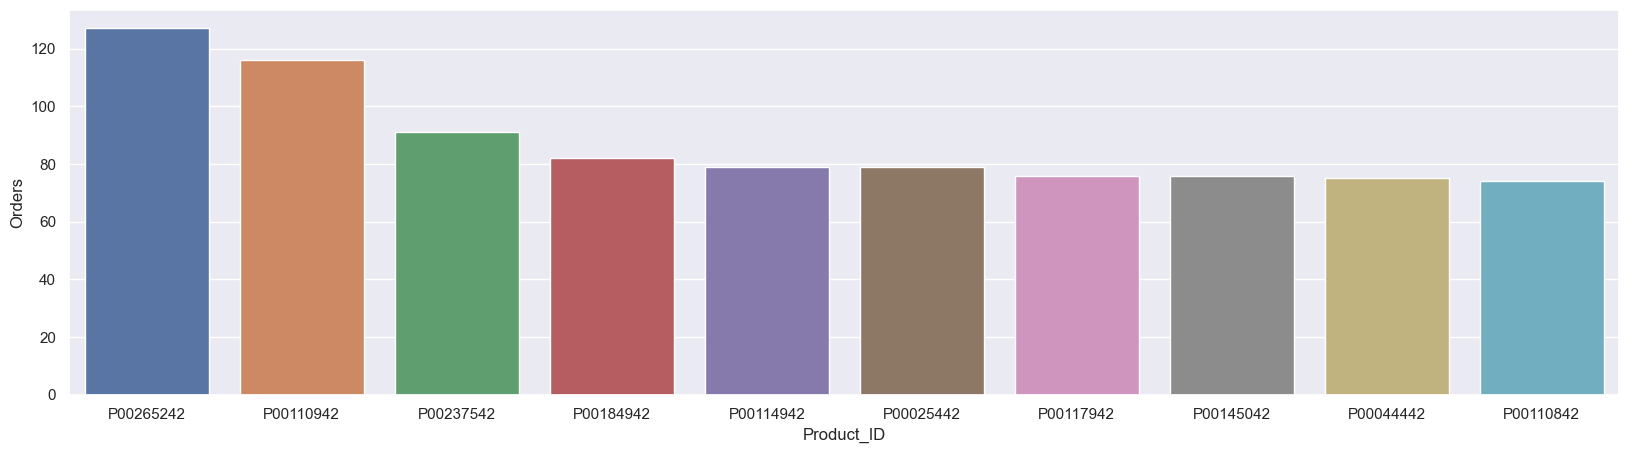

In [191]:
# Product Id by Amount

sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',hue='Product_ID')

<Axes: xlabel='Product_ID'>

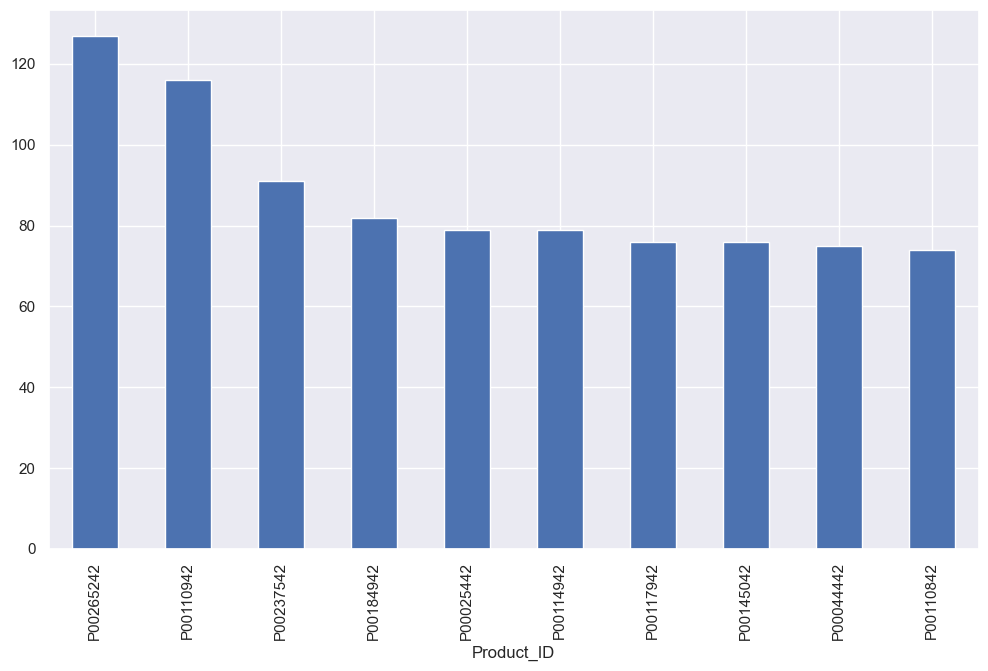

In [188]:
# Top 10 most sold products

fig1, ax1 = plt.subplots(figsize=(12,7))

df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion

Married women aged 26-35 years residing in the states of Uttar Pradesh, Maharashtra, and Karnataka, and employed in the fields of Information Technology, Healthcare, and Aviation, demonstrate a higher propensity to purchase products from categories such as Food, Clothing, and Electronics.